In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [98]:
df = pd.read_csv(r"D:\project\dataset\Credit Card Transactions Fraud Detection.csv")


In [99]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'])
y = df['is_fraud']



In [100]:
df_sample = df.sample(n=50000, random_state=42)
X = df_sample.drop(columns=['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'])
y = df_sample['is_fraud']
X = pd.get_dummies(X, drop_first=True)


In [101]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [103]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(X_res_scaled)

In [104]:
X_res_scaled = X_res_scaled[outliers == 1]
y_res = y_res[outliers == 1]


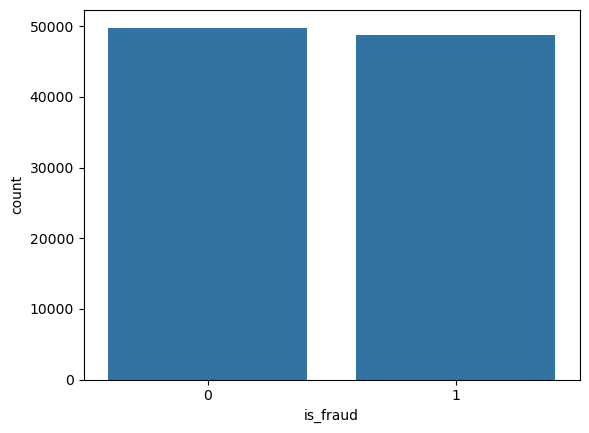

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_res)
plt.show()


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

In [109]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [110]:
y_pred = model.predict(X_test)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.77%


IndexError: boolean index did not match indexed array along dimension 0; dimension is 98622 but corresponding boolean dimension is 99610

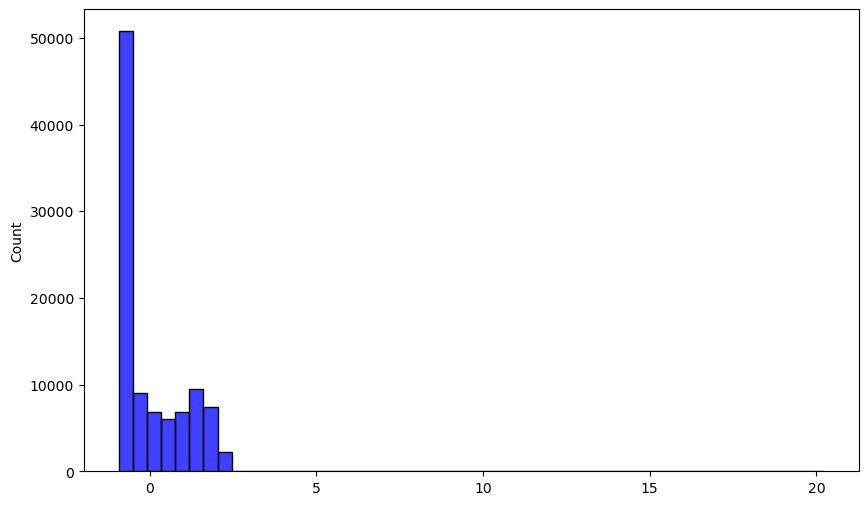

In [126]:
for i, feature in enumerate('amt'):
    plt.figure(figsize=(10, 6))
    sns.histplot(X_res_scaled[:, i], kde=False, bins=50, color='blue', label='All data')
    sns.histplot(X_res_scaled[outliers == -1, i], kde=False, bins=50, color='red', label='Outliers')
    plt.title(f'Histogram of {feature} with Outliers')
    plt.legend()
    plt.show()